In [35]:
import numpy as np; import matplotlib.pyplot as plt; import sklearn as sk; import seaborn as sns
from imageio import imread
from sklearn.feature_extraction.image import extract_patches_2d

(10, 2)


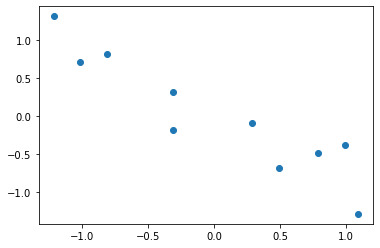

In [2]:
#Question 1
#a)
with open("pca-data-2d.txt") as f:
    lines=f.readlines()
#plt.scatter()
lines=[i.replace('    ', '').replace('\n', '').split('   ') for i in lines]
lines_float=[]
for index, line in enumerate(lines):
    lines_float.append([])
    for num in line:
        lines_float[index].append(float(num))

lines_float=np.array(lines_float)
centering_fkt = lambda x: x-x.mean()
lines_float_centered= lines_float -np.mean( lines_float, axis=0)
#plt.scatter(lines_float[:,0], lines_float[:,1])
plt.scatter(lines_float_centered[:,0], lines_float_centered[:,1])
print(lines_float_centered.shape)

[1.28402771 0.0490834 ] [[ 0.73517866  0.6778734 ]
 [-0.6778734   0.73517866]]


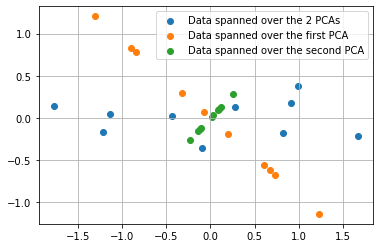

In [3]:
conver =np.cov(lines_float_centered.T, rowvar=True)
eig_val, eig_vec = np.linalg.eig(conver)
sorted_eig_val_ind = np.argsort(eig_val)[::-1]
sorted_eig_val = eig_val[sorted_eig_val_ind]
sorted_eig_vec = eig_vec[:,sorted_eig_val_ind]
n_components = 2 #you can select any number of components.
eigenvector_subset = sorted_eig_vec[:,0:n_components]
print(sorted_eig_val, sorted_eig_vec)
transfered_data = np.dot(eigenvector_subset.transpose(),lines_float_centered.transpose()).transpose()
plt.scatter(transfered_data[:,0], transfered_data[:,1],label= "Data spanned over the 2 PCAs")
plt.grid()

n_components = 1 #you can select any number of components.
eigenvector_subset = sorted_eig_vec[:,0:n_components]
#print(eigenvector_subset)
transfered_data = np.dot(eigenvector_subset.transpose(),lines_float_centered.transpose()).transpose()
#print(transfered_data)
plt.scatter(transfered_data*eigenvector_subset[0], transfered_data*eigenvector_subset[1],label= "Data spanned over the first PCA")

n_components = 2 #you can select any number of components.
eigenvector_subset = sorted_eig_vec[:,1:n_components]
#print(eigenvector_subset)
transfered_data = np.dot(eigenvector_subset.transpose(),lines_float_centered.transpose()).transpose()
#print(transfered_data)
plt.scatter(transfered_data*eigenvector_subset[0], transfered_data*eigenvector_subset[1], label="Data spanned over the second PCA")

plt.legend()

(500, 3)


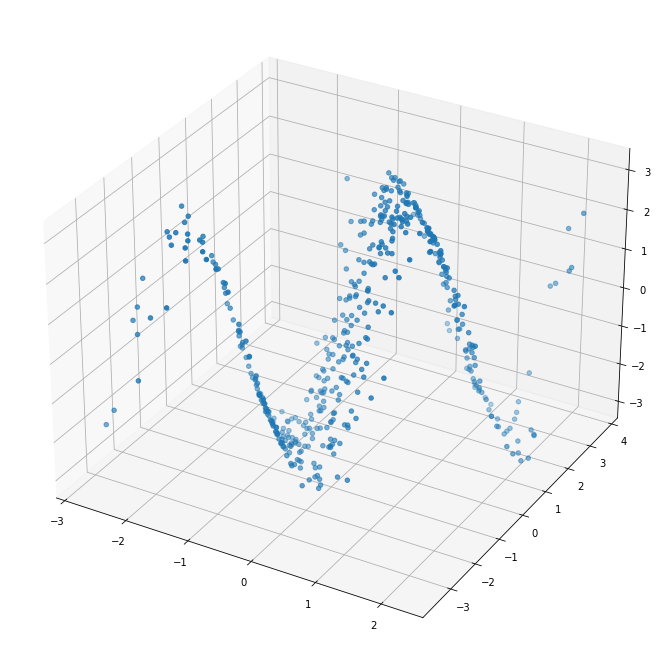

In [4]:
#Question 2 
#a)
lines_float=np.genfromtxt(fname= "pca-data-3d.txt", delimiter=",", dtype=np.float64 , skip_header=1)
centering_fkt = lambda x: x-np.mean(x, axis=0)
lines_float_centered= lines_float -np.mean( lines_float, axis=0)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(lines_float_centered[:,0], lines_float_centered[:,1], lines_float_centered[:,2])
print(lines_float_centered.shape)

[4.4947884  2.24956199 0.38503192] [[ 0.12121678  0.51120047 -0.85087048]
 [ 0.1844957   0.83065188  0.52533684]
 [ 0.9753296  -0.22066159  0.00637466]]


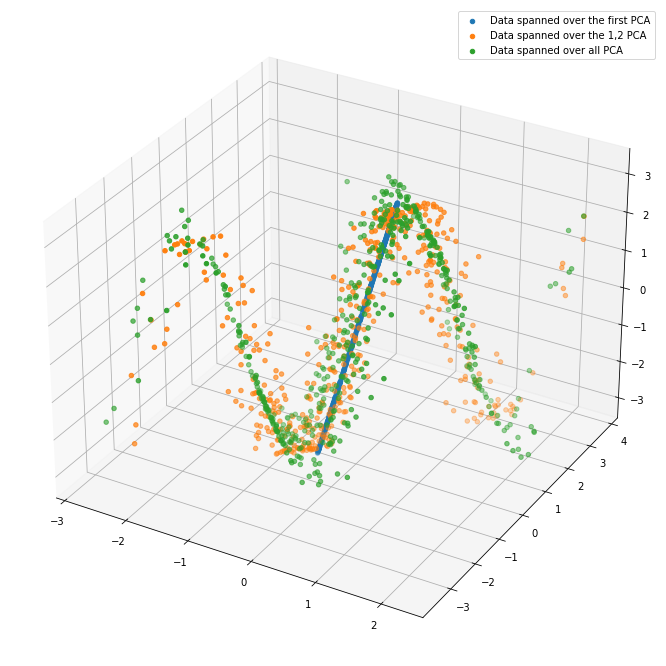

In [5]:
conver =np.cov(lines_float_centered.T, rowvar=True)
eig_val, eig_vec = np.linalg.eig(conver)
sorted_eig_val_ind = np.argsort(eig_val)[::-1]
sorted_eig_val = eig_val[sorted_eig_val_ind]
sorted_eig_vec = eig_vec[:,sorted_eig_val_ind]
n_components = 3 #you can select any number of components.
eigenvector_subset = sorted_eig_vec[:,0:n_components]
print(sorted_eig_val, sorted_eig_vec)
transfered_data = np.dot(eigenvector_subset.transpose(),lines_float_centered.transpose()).transpose()

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
#ax.scatter(transfered_data[:,0], transfered_data[:,1], transfered_data[:,2],label= "Data spanned over the 3 PCAs")
ax.grid()
eigenvector_1=sorted_eig_vec[:,0:1]
eigenvector_2=sorted_eig_vec[:,1:2]
eigenvector_3=sorted_eig_vec[:,2:3]

transfered_data_1 = np.dot(eigenvector_1.transpose(),lines_float_centered.transpose()).transpose()
transfered_data_2 = np.dot(eigenvector_2.transpose(),lines_float_centered.transpose()).transpose()
transfered_data_3 = np.dot(eigenvector_3.transpose(),lines_float_centered.transpose()).transpose()

ax.scatter(transfered_data_1*eigenvector_1[0], transfered_data_1*eigenvector_1[1], transfered_data_1*eigenvector_1[2],label= "Data spanned over the first PCA")


ax.scatter(transfered_data_1*eigenvector_1[0]+transfered_data_2*eigenvector_2[0], transfered_data_1*eigenvector_1[1]+ transfered_data_2*eigenvector_2[1], transfered_data_1*eigenvector_1[2]+ transfered_data_2*eigenvector_2[2],label= "Data spanned over the 1,2 PCA")



ax.scatter(transfered_data_1*eigenvector_1[0]+transfered_data_2*eigenvector_2[0]+transfered_data_3*eigenvector_3[0], transfered_data_1*eigenvector_1[1]+transfered_data_2*eigenvector_2[1]+transfered_data_3*eigenvector_3[1], transfered_data_1*eigenvector_1[2]+transfered_data_2*eigenvector_2[2]+transfered_data_3*eigenvector_3[2],label= "Data spanned over all PCA")


plt.legend()

# Q3 
##### a)

In [6]:
data=np.genfromtxt(fname= "expDat.txt", delimiter=",", dtype=np.float64 , skip_header=1)[:, 1:]
centering_fkt = lambda x: x-np.mean(x, axis=0)
data_centered= data -np.mean( data, axis=0)

In [7]:
data_centered= data_centered.T


In [8]:
conver =np.cov(data_centered, rowvar=True)
eig_val, eig_vec = np.linalg.eig(conver)
sorted_eig_val_ind = np.argsort(eig_val)[::-1]
sorted_eig_val = eig_val[sorted_eig_val_ind]
sorted_eig_vec = eig_vec[:,sorted_eig_val_ind]
n_components = 3 #you can select any number of components.
eigenvector_subset = sorted_eig_vec[:,0:n_components]
#print(sorted_eig_val, sorted_eig_vec, eigenvector_subset)

In [9]:
data_transformed = np.dot(sorted_eig_vec.T, data_centered)
e1 = eigenvector_subset[:,0]
e2 = eigenvector_subset[:,1]
data_pc1 = np.array([u1*e1 for u1 in data_transformed[0]])
data_pc2 = np.array([u2*e2 for u2 in data_transformed[1]]).T

In [10]:
time = np.arange(1, data.shape[0]+1)

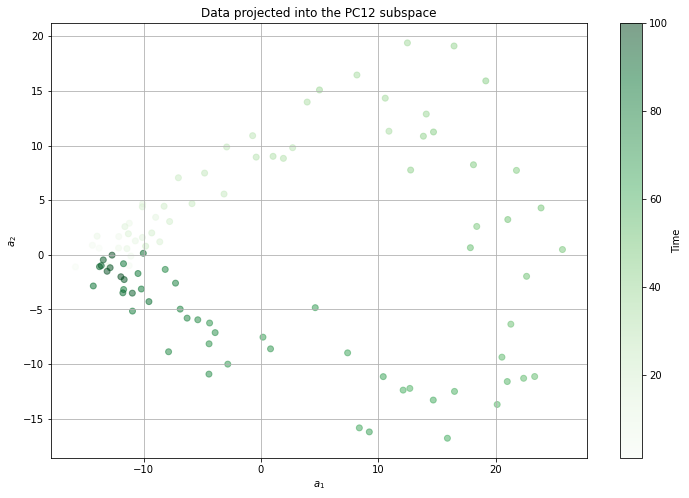

In [11]:
# Plots of projected data in PC12
colors = time
plt.figure(figsize=(12,8))
plt.scatter( data_transformed[0], data_transformed[1], c = colors, cmap = "Greens", alpha = 0.5)
plt.xlabel('$a_{1}$')
plt.ylabel('$a_{2}$')
plt.title("Data projected into the PC12 subspace")
plt.colorbar(label = "Time")
plt.grid()
plt.show()

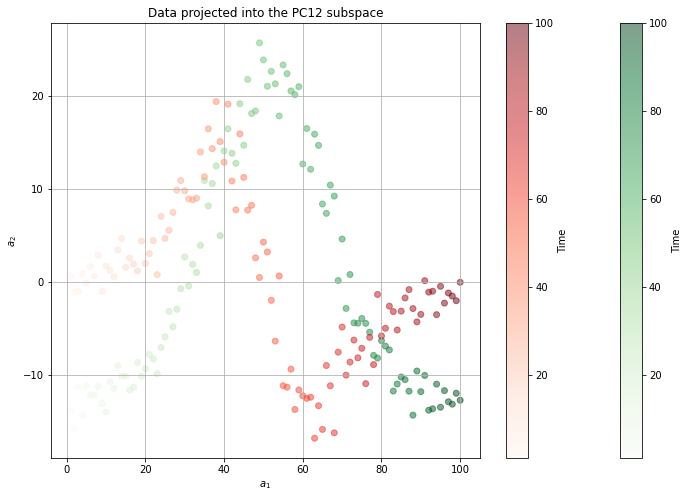

In [12]:
colors = time
plt.figure(figsize=(12,8))
plt.scatter( time, data_transformed[0], c = colors, cmap = "Greens", alpha = 0.5)
plt.colorbar(label = "Time")
plt.scatter( time, data_transformed[1], c = colors, cmap = "Reds", alpha = 0.5)
plt.xlabel('$a_{1}$')
plt.ylabel('$a_{2}$')
plt.title("Data projected into the PC12 subspace")

plt.colorbar(label = "Time")
plt.grid()
plt.show()

In [20]:
data_shuffled = sk.utils.shuffle(data_centered)
conver_s =np.cov(data_shuffled, rowvar=True)
eig_val_s, eig_vec_s = np.linalg.eig(conver_s)
sorted_eig_val_ind_s = np.argsort(eig_val_s)[::-1]
sorted_eig_val_s = eig_val[sorted_eig_val_ind_s]
sorted_eig_vec_S = eig_vec_s[:,sorted_eig_val_ind_s]

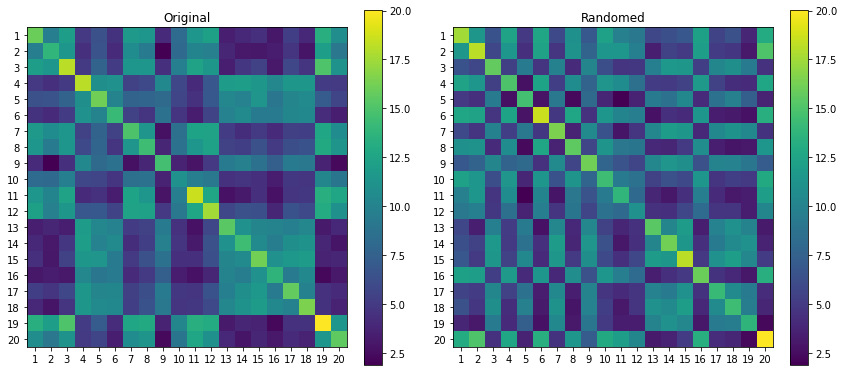

In [21]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,12))

im = ax1.imshow(conver, interpolation='none')
ax1.set_title('Original')
# Add a colorbar to the subplot
# The fraction argument was adjusted until the colorbar had the appropriate size
plt.colorbar(im, ax=ax1, fraction=0.05);
# adjust axis labels to show variable index (e.g. 1 for x1, 2 for x2,...)
ax1.set_xticks(np.arange(len(conver)))
ax1.set_xticklabels(np.arange(len(conver))+1)
ax1.set_yticks(np.arange(len(conver)))
ax1.set_yticklabels(np.arange(len(conver))+1)

im = ax2.imshow(conver_s, interpolation='none')
ax2.set_title('Randomed')
# Add a colorbar to the subplot
# The fraction argument was adjusted until the colorbar had the appropriate size
plt.colorbar(im, ax=ax2, fraction=0.05);
# adjust axis labels to show variable index (e.g. 1 for x1, 2 for x2,...)
ax2.set_xticks(np.arange(len(conver_s)))
ax2.set_xticklabels(np.arange(len(conver_s))+1)
ax2.set_yticks(np.arange(len(conver_s)))
ax2.set_yticklabels(np.arange(len(conver_s))+1)
# plt.colorbar(fraction=0.04)
plt.show() # gets rid of matplotlib printing

Text(0.5, 1.0, 'Scree Plot Shuffeld vs Original ')

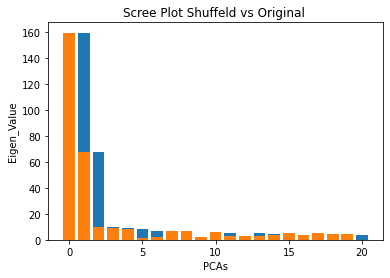

In [22]:
x= [i for i in range(1,21)]
plt.bar(x, eig_val_s)
x= [i for i in range(0,20)]
plt.bar(x, eig_val)
plt.xlabel('PCAs')
plt.ylabel('Eigen_Value')
plt.title("Scree Plot Shuffeld vs Original ")

# 4

In [163]:
n_imgs= [imread(f'imgpca/n{i+1}.jpg') for i in range(10)]
b_imgs= [imread(f'imgpca/b{i+1}.jpg') for i in range(10)]
rng = np.random.RandomState(0)
patch_size = (16, 16)
n_imgs_patchs_dict ={}
b_imgs_patchs_dict ={}
for ind, n_img in enumerate(n_imgs):
    patches=extract_patches_2d(n_img, patch_size, max_patches=500, random_state=rng)
    n_imgs_patchs_dict[0].append(patches.flatten().reshape(500, 256))
for ind, b_img in enumerate(b_imgs):
    patches=extract_patches_2d(b_img, patch_size, max_patches=500, random_state=rng)
    b_imgs_patchs_dict[0]+= patches.flatten().reshape(500, 256)

KeyError: 0

In [161]:
n_imgs_patchs_dict[0].shape, b_imgs_patchs_dict[0].shape

((500, 256), (500, 256))

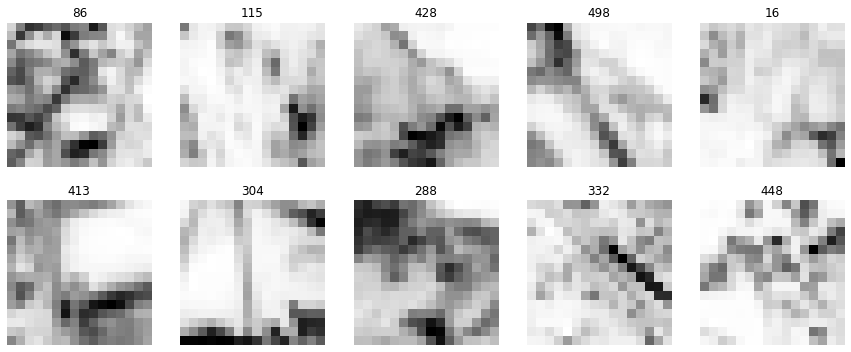

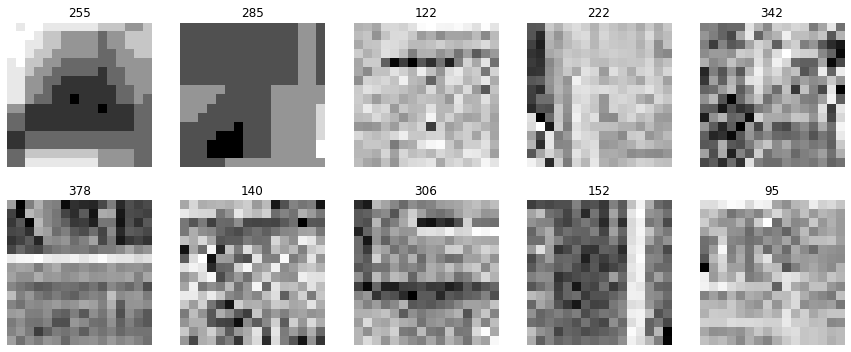

In [159]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
img_idx= np.random.randint(len(n_imgs_patchs_dict))
for ax in axes.flatten():
    rand_img = np.random.randint(len(n_imgs_patchs_dict[img_idx]))
    plt.sca(ax)
    plt.imshow(n_imgs_patchs_dict[img_idx][rand_img,: ].reshape(16, 16), cmap='Greys', interpolation=None)
    plt.title(str(rand_img))
    plt.axis('off')
plt.show()    

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
img_idx= np.random.randint(len(b_imgs_patchs_dict))
for ax in axes.flatten():
    rand_img = np.random.randint(len(b_imgs_patchs_dict[img_idx]))
    plt.sca(ax)
    plt.imshow(b_imgs_patchs_dict[img_idx][rand_img,: ].reshape(16, 16), cmap='Greys', interpolation=None)
    plt.title(str(rand_img))
    plt.axis('off')
plt.show()